## THE SPARKS FOUNDATION 

### Data Science & Business Analytics Internship - MAY21

### NAME - SHREYASI KUNDU 

### GRIPMAY21 

### TASK 1: Prediction using Supervised ML 

##### In this task I have to Predict the percentage of an student based on the no. of study hours. 
 

##### IMPORTING THE REQUIRED STANDARD LIBRARIES

In [34]:
#importing the required libraries

import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt
import seaborn as sb
import statsmodels.api as sm
from sklearn import linear_model
from sklearn.model_selection import train_test_split  

%matplotlib inline

##### READING THE DATA

In [35]:
#reading the data

data = pd.read_csv("http://bit.ly/w-data")
print("The given data is as follows:")

#displaying first 10 lines of the data
data.head(10)

The given data is as follows:


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [36]:
#returning the number of rows and columns in the dataset
print(data.shape)

(25, 2)


#### There are 25 rows and 2 columns in the dataset 

In [37]:
#showing a statistical summary of the data
print(data.describe())

           Hours     Scores
count  25.000000  25.000000
mean    5.012000  51.480000
std     2.525094  25.286887
min     1.100000  17.000000
25%     2.700000  30.000000
50%     4.800000  47.000000
75%     7.400000  75.000000
max     9.200000  95.000000


#### The above code gives us the five number summary of the data

In [38]:
#checking if there are any null values in the data set
data.isnull().values.any()

False

#### There are no missing values in the dataset.

##### VISUALIZING THE DATASET 

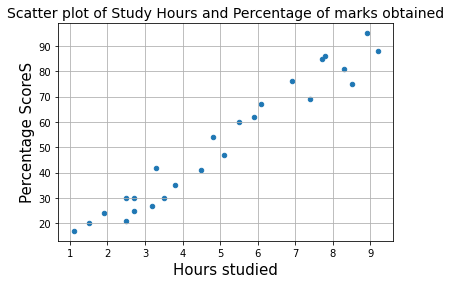

In [39]:
data.plot(x='Hours', y='Scores',kind='scatter')  
plt.title('Scatter plot of Study Hours and Percentage of marks obtained',fontsize=14)  
plt.xlabel('Hours studied',fontsize=15)  
plt.ylabel('Percentage ScoreS',fontsize=15) 
plt.grid(True)
plt.show()

#### From the above scatter plot, we get an idea that there is a positive linear relation between the number of hours studied and percentage of score obtained by the student. So we fit a linear regression model to the data.

In [40]:
#Calculating the extent of correlation
data.corr(method= 'pearson')

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


#### So, there exists a high positive correlation between 'hours of study' and 'percentage scores'

##### FITTING THE LINEAR MODEL 

For simple linear regression analysis we require an independent variable and a dependent variable. So, I divide the dataset in two variables x and y, where x(independent variable)= hours of study and y(dependent variable)= percentage scores.

In [41]:
#Dividing the data set into x and y
x= data.iloc[:, :-1].values  
y = data.iloc[:, 1].values  
print("Values of x(hours):",x)
print("Corresponding values of y(scores):",y)

Values of x(hours): [[2.5]
 [5.1]
 [3.2]
 [8.5]
 [3.5]
 [1.5]
 [9.2]
 [5.5]
 [8.3]
 [2.7]
 [7.7]
 [5.9]
 [4.5]
 [3.3]
 [1.1]
 [8.9]
 [2.5]
 [1.9]
 [6.1]
 [7.4]
 [2.7]
 [4.8]
 [3.8]
 [6.9]
 [7.8]]
Corresponding values of y(scores): [21 47 27 75 30 20 88 60 81 25 85 62 41 42 17 95 30 24 67 69 30 54 35 76
 86]


In [42]:
#Splitting the dataset in 80-20 ratio
X_train, X_test, y_train, y_test = train_test_split(x, y, 
                            test_size=0.2, random_state=0)

In [43]:
#Training the algorithm
lm =linear_model.LinearRegression()  
model=lm.fit(X_train, y_train) 
print("Intercept = ",model.intercept_)
print("Coefficient of x= ",model.coef_)

Intercept =  2.018160041434683
Coefficient of x=  [9.91065648]


In [44]:
#The regression line
regline = model.intercept_ + model.coef_*x


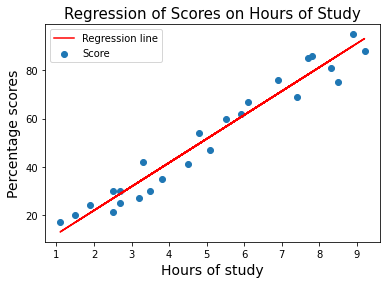

In [45]:
# Plotting the regression line
plt.scatter(data.Hours,data.Scores, label='Score')
plt.plot(x,regline,color='RED',label='Regression line');
plt.title("Regression of Scores on Hours of Study",fontsize=15)
plt.xlabel("Hours of study",fontsize=14)
plt.ylabel("Percentage scores",fontsize=14)
plt.legend()
plt.show()

In [46]:
#predicted the scores based on hours of study data
y_predicted_value= model.predict(X_test)
df = pd.DataFrame({'Actual': y_test,'Predicted': y_predicted_value})
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


##### PREDICTING THE  PERCENTAGE SCORE WHEN STUDY HOURS = 9.25 per DAY

In [47]:
print("Hours of Study = 9.25") # data - In Hours
y_predicted_value=lm.predict([[9.25]])
print("Predicted  percentage score=",format(y_predicted_value[0])) 

Hours of Study = 9.25
Predicted  percentage score= 93.69173248737538


##### CHECKING ACCURACY OF THE MODEL 

In [48]:
x=sm.add_constant(x)
mode=sm.OLS(y,x).fit()
predictions=mode.predict(x)
print(mode.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.953
Model:                            OLS   Adj. R-squared:                  0.951
Method:                 Least Squares   F-statistic:                     465.8
Date:                Thu, 13 May 2021   Prob (F-statistic):           9.13e-17
Time:                        20:43:18   Log-Likelihood:                -77.514
No. Observations:                  25   AIC:                             159.0
Df Residuals:                      23   BIC:                             161.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.4837      2.532      0.981      0.3

##### COMMENT:

#### Our regression equation is y=9.91065648x +2.01816000414134683 where y= percentage score, x= study hours. Here we see that here adjusted R_squared is 0.951. This means that 95.1% of the variablity is explained by the least square linear regression of percentage score on number of study hours, indicating that it is giving a good fit to the data.

##### TASK RESULT:
#### If a student studies for 9.25hrs then the predicted percentage score is 93.69173248737538 or 93.69 (rounded off to 2 decimal places).